In [1]:
max_height=82 #the optimal height of the hook

In [2]:
elevator_height_initial=28 #height of the elevator above the ground initially.

In [3]:
hook_height_initial=28 #height of the winch above the ground

In [4]:
hook_winch_rate=64.1 #in inches per second

In [5]:
gap_left=3 #distance between the front of the robot and the elevator (front and back are interchangeable)

In [6]:
gap_right=31-3 #distance between the back of the robot and the elevator (front and back are interchangeable)

In [7]:
def elevator_height(time,er): #find the height of the elevator as a function of time and rate
    string_unwound=time*er
    return elevator_height_initial+3*string_unwound

In [8]:
def hook_height(time): #find the height of the hook if fully taught at time t
    string_unwound=time*hook_winch_rate+gap_left+gap_right
    a=string_unwound
    x=gap_left
    y=gap_right
    return sqrt((a - x - y)*(a + x - y)*(a - x + y)*(a + x + y))/(2*a)+hook_height_initial

In [9]:
timev=n(solve(max_height==hook_height(x),x,to_poly_solve="true")[1].rhs()) #time when hook is at max height

In [10]:
elevator_rate=n(solve(max_height==elevator_height(timev,x),x,to_poly_solve="true")[0].rhs()) #in inches per second

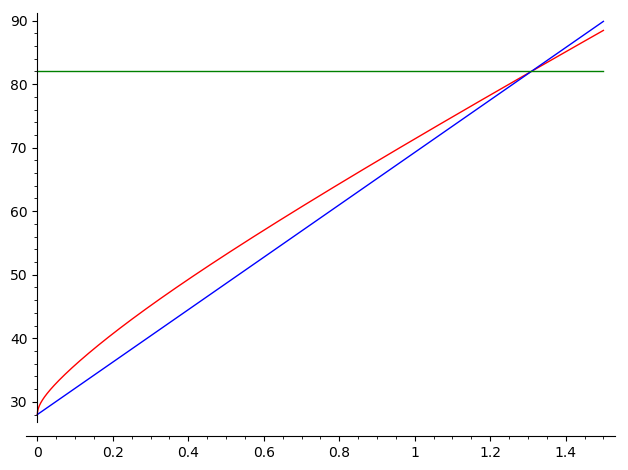

In [11]:
g=Graphics() #graph of max height, hook height (if taught) and elevator height
g += plot(hook_height(x),(x,0,1.5),color="red") #hook height (if fully taught) following elevator path
g += plot(elevator_height(x,elevator_rate),(x,0,1.5)) #elevator height
g += plot(max_height,(x,0,1.5),color="green") #the optimal maximum height
g.show()

In [12]:
timev #time to go from start to max height

1.30906231567772

In [13]:
elevator_rate #in/sec

13.7503003366812